In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [35]:
embedding = np.load('./embedding_interp.npy')
files = np.load('./files_interp.npy')

In [36]:
feat = embedding[:, 0, :]

In [37]:
pca = PCA()
X = pca.fit_transform(feat)

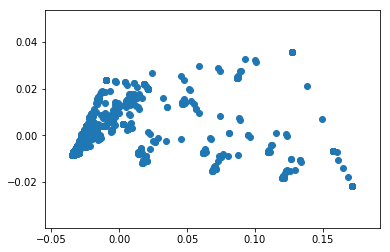

In [38]:
plt.scatter(*X[:, :2].T)

In [31]:
names = [file.replace('../../solo_sounds/', '').replace('.mp3', '') for file in files]

In [32]:
names

['Balafon2_Bright',
 'Bass_Trombone_Solo',
 'Clarinet_Combi',
 'Clav6_Bright',
 'Clean3_Chorus_Guitar',
 'Concert_Flute_Solo_Legato_Vibrato',
 'Cuba_Trumpet',
 'Double_Bass_Solo_Staccato',
 'Dual_Osc6_Vibrato_Bass',
 'Guitar-Dual_Amped_Heavy',
 'Guitar-Reverse_FX',
 'Hammer_Dulcimer',
 'Harp',
 'Low_Wow',
 'Marimba1_Classic',
 'Pan_Flute_Winds',
 'Piccolo_Solo_Legato_Vibrato',
 'Plastic_Vibraphone',
 'Plucked',
 'Rhythmic_Octaves_Bass',
 'Shamisen',
 'Sneaky_Bass',
 'So_High',
 'Suitar_Guitar',
 'Upright_Bass',
 'Violin_Solo',
 'Wurly_Speaker',
 'cat',
 'cow',
 'dog',
 'goose',
 'thunder']

In [33]:
names.index('goose')

30